In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

Задача 1: Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

-0.000997304916381836


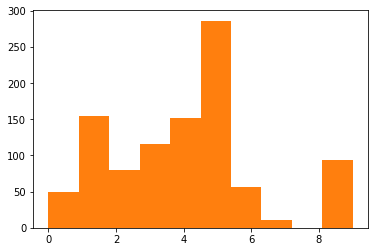

In [10]:
a=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

firstly=time.time()
a /= a.sum()
a = a.cumsum()
k = np.searchsorted(a, np.random.rand(1000))
finaly=time.time()
plt.hist(k)

firstly1=time.time()
a1 = np.sort(a)
a1 /= a1.sum()
a1 = a1.cumsum()
k1 = np.argsort(a)[np.searchsorted(a1, np.random.rand(1000))]
finaly1=time.time()
plt.hist(k)
print(finaly1-firstly1-(finaly-firstly ))

Задача 2: Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

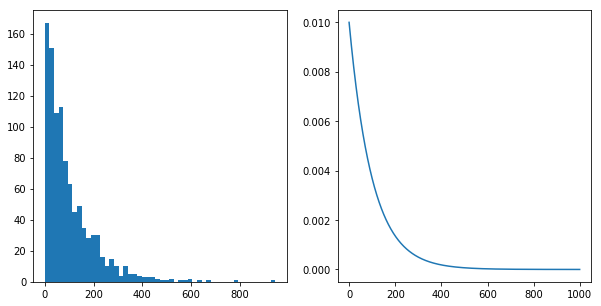

In [11]:
x= np.random.rand(1000)
lambd = 0.01
y=-np.log(1-x)/lambd
fig, ax = plt.subplots(1,2,figsize =(10,5))
ax[0].hist(y, bins = 50)
ax[1].plot(np.arange(1000),lambd * np.exp(-lambd*np.arange(1000)))
plt.show()

Задача 3: Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

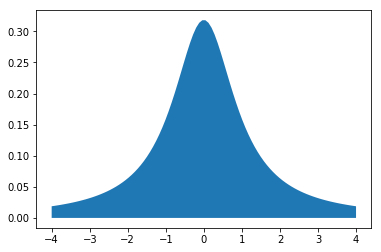

In [12]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

(array([ 7.,  9., 21., 33., 87., 80., 46., 27., 13.,  4.]),
 array([-3.96668928, -3.21383715, -2.46098503, -1.7081329 , -0.95528077,
        -0.20242864,  0.55042349,  1.30327562,  2.05612775,  2.80897988,
         3.56183201]),
 <a list of 10 Patch objects>)

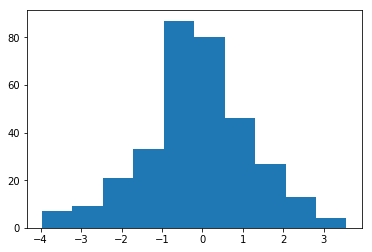

In [13]:
a = np.array([8 * np.random.rand(1000) - 4])
b = np.random.rand(1000) / 3
k = a[(lambda x: 1 / ((x ** 2 + 1) * np.pi)) (a)>=(b) ]
plt.hist(k)


Задача 4: Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

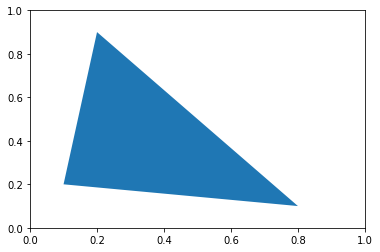

In [14]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

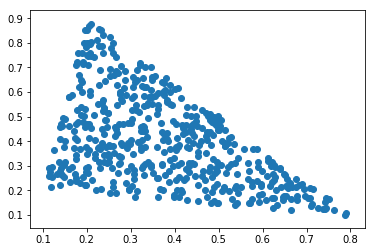

In [15]:
import math as mt
N = np.random.rand(500)

b = np.array([(1 - mt.sqrt(1 - N[i]))for i in range(500) ]) 
c = np.random.rand(500) * (1 - b) 
x = 0.1 + 0.7 * b + 0.1 * c 
y = 0.2 - 0.1 * b + 0.7 * c 
plt.scatter(x, y)
plt.show()


Задача 5: Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

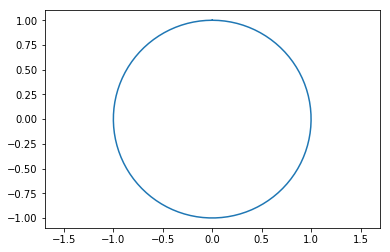

In [16]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

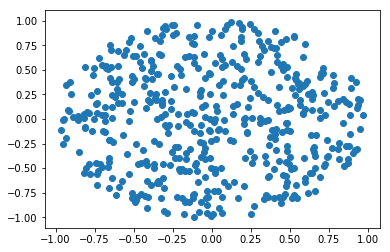

In [17]:
N = np.random.rand(500)
a = np.sqrt(N) 
b = np.random.rand(500) * 2 * np.pi 
plt.scatter(a * np.cos(b), a * np.sin(b))
plt.show()

Задача 6: Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

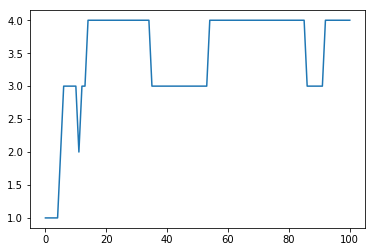

In [18]:
probability = [0.05, 0.95] 
pos = [1]
a = np.random.random(100)
down = a < probability[0]
up = a > probability[1]
for idown, iup in zip(down, up):
    down1 = idown and pos[-1] > 1
    up1 = iup and pos[-1] < 4
    pos.append(pos[-1] - down1 + up1)
plt.plot(pos)
plt.show()

Задача 7: Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

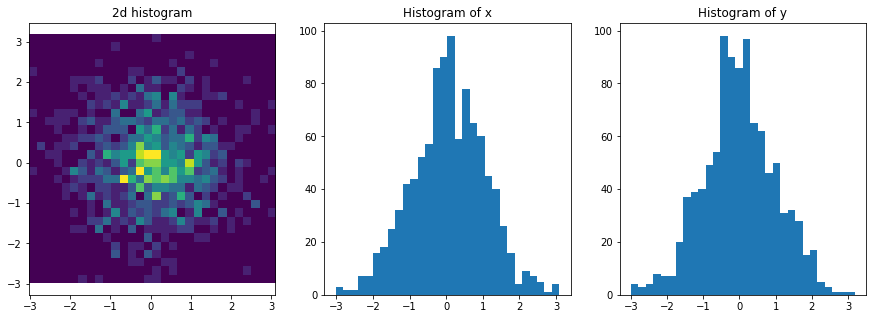

In [19]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

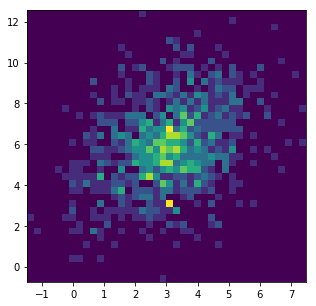

In [20]:
import math as mt
x0= x + y + 3 
y0=((1 - mt.sqrt(7)) /2 * x)+ (1 + mt.sqrt(7))/2 * y + 6 
plt.figure(figsize=(5,5))
plt.hist2d(x0, y0, bins =40) 
plt.show()


Задача: С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число π. Теоретически обоснуйте необходимое число бросаний, чтобы оценить число π с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

In [47]:
def func(n):
    k=0
    for i in np.arange(n):
        x= np.random.uniform(-1, 1)
        y= np.random.uniform(-1, 1)
        if mt.sqrt(x*x + y*y) <= 1:
            k+=1
    return (4*float(k)/n)
func(700000)

3.139982857142857